Name : Veeragani Uday Sandeep

Email ID : udaysandeep.v9@gmail.com

Phone No : 6303241578

In [1]:
##importing necessary modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Downloading dataset and loading it into the jupyter

In [2]:
df = pd.read_csv('dataframe_.csv')

In [3]:
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


# checking data info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [5]:
df.isnull()

,input,output
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1692,False,False
1693,False,False
1694,False,False
1695,False,False


In [6]:
df[df['input'].isna()]

,input,output
1439,NaN,NaN


I found that entry number 1439 have null values so removing that record

In [7]:
df = df.drop(1439)

In [8]:
df[df['input'].isna()]

,input,output


with this process I dropped the null value in the data.

# Visualizing the data

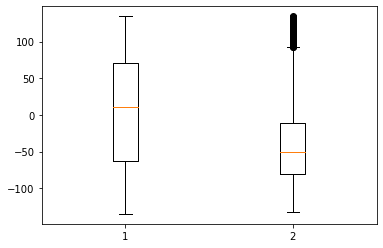

In [9]:
plt.boxplot(df)
plt.show()

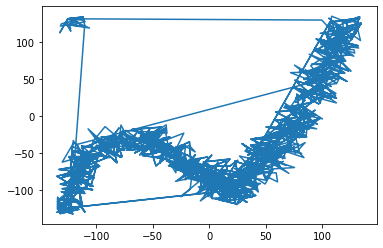

In [10]:
plt.plot(df['input'],df['output'])

<AxesSubplot:xlabel='input', ylabel='output'>

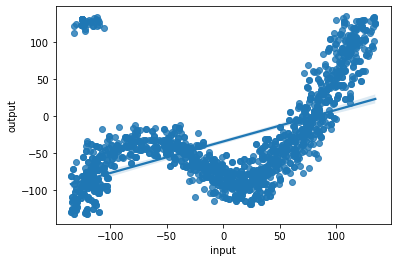

In [11]:
sns.regplot(data = df, x = 'input',y='output')

<h3> 1. we observed that the graph follows a smooth curve fashion so it is clear that our input and output variables have a good relation. </h3>

<h3> 2. we can see in the top left corner of the plot there are some points which are our outliers. </h3>

# Handling Outliers

In [12]:
df = df[(df['input'] > -100) | (df['output'] < 100)]

In [13]:
df.shape

(1657, 2)

<AxesSubplot:xlabel='input', ylabel='output'>

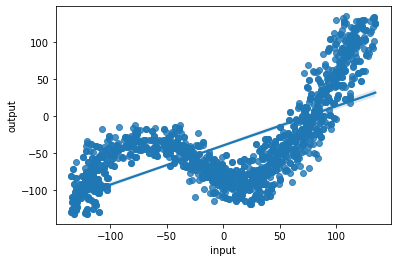

In [14]:
sns.regplot(data = df, x = 'input',y='output')

<h3> from the above code we removed outliers in the data which we can clearly observe in the above graph </h3>

# Building MachineLearning model

<h3>Performing train test split on the given data</h3>

In [15]:
from sklearn.model_selection import train_test_split
X=X=df[['input']]
Y=df['output']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=20)

<h3>Training the data</h3>

In [16]:

# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
  
lin.fit(X_train, y_train)

LinearRegression()

In [17]:
lin.score(X_test,y_test)

0.4356909086526115

<h3>Predicting on test data</h3>

In [18]:
y_pred = lin.predict(X_test)

In [19]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

39.57101314405662
2206.531128979046
6.290549510500384


In [20]:

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X_train)
X_poly_test=poly.fit_transform(X_test) 
poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [21]:
y_pred1 = lin2.predict(X_poly_test)

# Evaluation of metrics

In [22]:
print(metrics.mean_absolute_error(y_test,y_pred1))
print(metrics.mean_squared_error(y_test,y_pred1))
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred1)))

16.920405121751543
497.435313183989
4.113442004179899


In [23]:
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 6)
X_poly1 = poly.fit_transform(X_train)
X_poly_test1=poly.fit_transform(X_test) 
poly.fit(X_poly1, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly1, y_train)

LinearRegression()

In [24]:
y_pred2 = lin2.predict(X_poly_test1)

# Evaluation of metrics

In [25]:
print(metrics.mean_absolute_error(y_test,y_pred2))
print(metrics.mean_squared_error(y_test,y_pred2))
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred2)))

16.049728202656325
443.91778006938716
4.006211202951778


# Hyperparameter Tuning and Feature Engineering

In [26]:
a = []

for i in range(3,10):
    poly = PolynomialFeatures(degree = i)
    X_poly1 = poly.fit_transform(X_train)
    X_poly_test1=poly.fit_transform(X_test) 
    poly.fit(X_poly1, y_train)
    lin2 = LinearRegression()
    lin2.fit(X_poly1, y_train)
    y_pred2 = lin2.predict(X_poly_test1)
    x = np.sqrt(metrics.mean_absolute_error(y_test,y_pred2))
    a.append(x)

In [27]:
a

[4.468629524919237,
 4.113442004179899,
 4.012331061065757,
 4.006211202951778,
 4.0072123836117814,
 4.066746729053513,
 4.244672293386724]

# model with degree 6 have root mean square error 4.006

In [28]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(10), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}

poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=10, scoring='neg_mean_squared_error')
poly_grid.fit(X,Y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='neg_mean_squared_error')

In [29]:
poly_grid.best_params_

{'linearregression__fit_intercept': True,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 8}

In [30]:
poly2 = PolynomialFeatures(degree=8)
X_poly2 = poly2.fit_transform(X_train)
X_poly_test2=poly2.fit_transform(X_test) 
poly2.fit(X_poly1, y_train)
lin3 = LinearRegression(fit_intercept=True,normalize=True)
lin3.fit(X_poly2, y_train)

LinearRegression(normalize=True)

In [31]:
y_pred3 = lin3.predict(X_poly_test2)

In [32]:
print(metrics.mean_absolute_error(y_test,y_pred3))
print(metrics.mean_squared_error(y_test,y_pred3))
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred3)))

16.060902268217223
443.42463921733224
4.007605552972651


# model with degree 8 have root mean square error 4.007

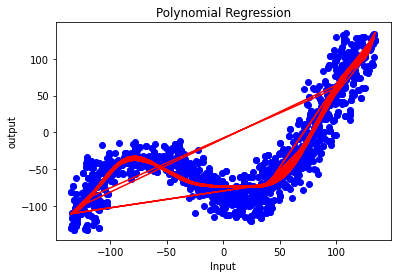

In [33]:
plt.scatter(X, Y, color = 'blue')
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Input')
plt.ylabel('output')
  
plt.show()

# here we can conclude that that trained Polynomial Regression model with degree 6 is the best fit on the data which is visualized in the above graph